<a href="https://colab.research.google.com/github/hruthiksiva/ml-algorithms/blob/main/sparse_encode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import sparse_encode


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.750e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(


Original Coefficients: [0.5 0.  0.  0.8]
Recovered Coefficients: [[ 0.     -0.375   0.      2.2625]]


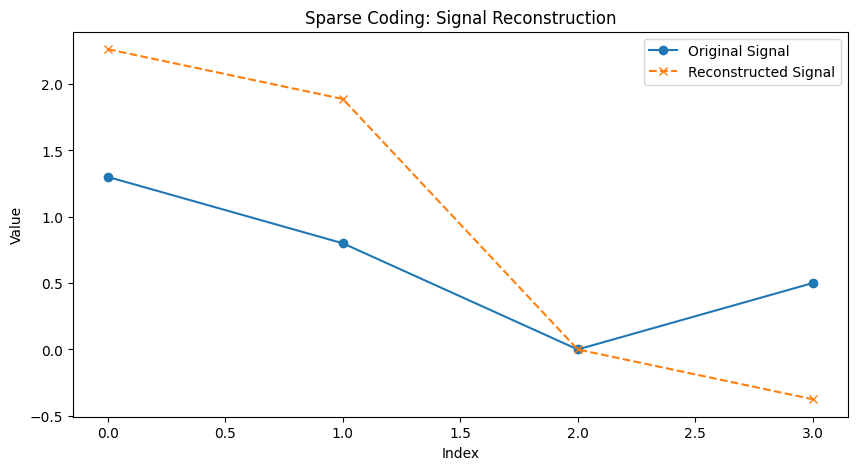

In [8]:
# Step 1: Create a dictionary (basis functions)
# Each column is a component, matching the signal's dimensionality
dictionary = np.array([
    [1, 0, 0, 1],  # Component 1
    [0, 1, 0, 1],  # Component 2
    [0, 0, 1, 0],  # Component 3
    [1, 1, 0, 0]   # Component 4
]).T  # Transpose to make it a 4x4 matrix

# Step 2: Generate a signal as a combination of components
# Signal = 0.5 * Component 1 + 0.8 * Component 4
true_coefficients = np.array([0.5, 0, 0, 0.8])  # Sparse representation (size matches dictionary columns)
signal = dictionary @ true_coefficients  # Matrix multiplication

# Step 3: Recover sparse coefficients using sparse coding
recovered_coefficients = sparse_encode(
    X=signal.reshape(1, -1),    # Signal (reshaped as a row)
    dictionary=dictionary,      # Dictionary of components
    alpha=0.1                   # Regularization for sparsity
)

# Step 4: Display results
print("Original Coefficients:", true_coefficients)
print("Recovered Coefficients:", recovered_coefficients)

# Plot the signal and reconstructed signal
reconstructed_signal = dictionary @ recovered_coefficients.T

plt.figure(figsize=(10, 5))
plt.plot(signal, label='Original Signal', marker='o')
plt.plot(reconstructed_signal.flatten(), label='Reconstructed Signal', linestyle='--', marker='x')
plt.legend()
plt.title("Sparse Coding: Signal Reconstruction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()